# Medical Insurance Cost
Lien externe vers le dataset kaggle : [ici](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction/data)

#### Contexte

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/medical_insurance.csv", sep=",")

In [103]:
import warnings

warnings.filterwarnings('ignore')

Hypothèses : 
- Les coûts de l'assurance maladie augmentent avec l'âge, l'IMC, le tabac
- Le tabac devrait être le facteur le plus important pour déterminer le coût de l'assurance maladie
- Grosse différence entre les fumeurs et les non-fumeurs.
- Aucune différence entre homme / femme
- Le nombre d'enfants n'a pas d'impact sur le coût de l'assurance maladie -> à vérifier sur l'impact avec le sexe
- la région a un impact sur le coût de l'assurance maladie
- IMC + tabac -> impact sur le coût de l'assurance maladie

#### EDA

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Il y a 7 colonnes dans le dataset :
- age : age du bénéficiaire principal
- sex : sexe du bénéficiaire principal
- bmi : indice de masse corporelle
- children : nombre d'enfants couverts par l'assurance-santé / nombre de personnes à charge
- smoker : fumeur ou non
- region : la région du pays où réside le bénéficiaire (nord-est, sud-est, sud-ouest, nord-ouest)
- charges : coûts médicaux individuels facturés par la compagnie d'assurance : **variable cible**


Il y a 2772 observations dans le dataset et il ne contient pas de valeurs manquantes.

In [105]:
# Count unique combinaisons of values in columns
df = df.drop_duplicates()

In [106]:
df.shape

(1337, 7)

On remarque que les données sont répétitives, il n'y a que 1338 combinaisons uniques de valeurs pour les 6 premières colonnes. Cela signifie que les données ont été copiées plusieurs fois pour augmenter la taille du dataset. On ne garde donc que les combinaisons uniques de valeurs.

In [107]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [108]:
nb = (df[df["bmi"]<24.9].count())
total = df["bmi"].count()
print("Percentage of people with a BMI lower than 24.9: ", nb/total*100)
print(nb)
print(total)

Percentage of people with a BMI lower than 24.9:  age         18.100224
sex         18.100224
bmi         18.100224
children    18.100224
smoker      18.100224
region      18.100224
charges     18.100224
dtype: float64
age         242
sex         242
bmi         242
children    242
smoker      242
region      242
charges     242
dtype: int64
1337


In [109]:
nb = (df[df["smoker"] == 1]["smoker"].count())
total = df["smoker"].count()
print("Percentage of people who smoke ", nb/total*100)
print(nb)
print(total)

Percentage of people who smoke  0.0
0
1337


In [110]:
nb = (df[df["sex"] == 1]["sex"].count())
total = df["sex"].count()
print("Percentage of male ", nb/total*100)
print(nb)
print(total)

Percentage of male  0.0
0
1337


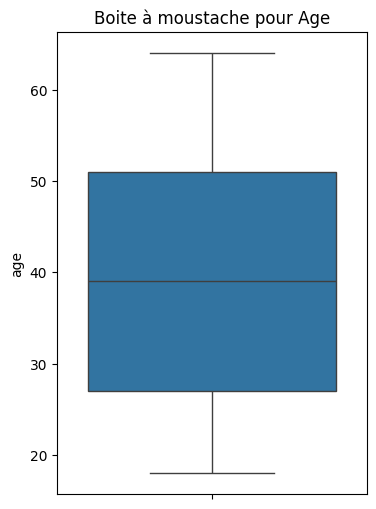

In [111]:
# Multi boxplot for BMI, age, Charges
plt.figure(figsize=(4, 6))
sns.boxplot(y=df['age'])
plt.title('Boite à moustache pour Age')
plt.show()

In [112]:
# On itére sur les colonnes quantitatives pour voir les values counts
for col in ["children", "smoker", "region", "sex"]:
    print(df[col].value_counts(), "\n")

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 

smoker
no     1063
yes     274
Name: count, dtype: int64 

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64 

sex
male      675
female    662
Name: count, dtype: int64 



In [113]:
# Label encoding car pas de relation d'ordre entre les valeurs : smoker, sex
# One hot encoding car pas de relation d'ordre entre les valeurs : region

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_smoker = LabelEncoder()
le_sex = LabelEncoder()
oh_region = OneHotEncoder(handle_unknown="ignore")

df["smoker"] = le_smoker.fit_transform(df["smoker"])
df["sex"] = le_sex.fit_transform(df["sex"])

# One hot encoding sur la colonne region
encoded_region = oh_region.fit_transform(df[["region"]])
encoded_region = pd.DataFrame(encoded_region.toarray(), columns=["northeast", "northwest", "southeast", "southwest"])
df.drop(columns=["region"], inplace=True)
df = pd.merge(df, encoded_region, left_index=True, right_index=True)

In [114]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

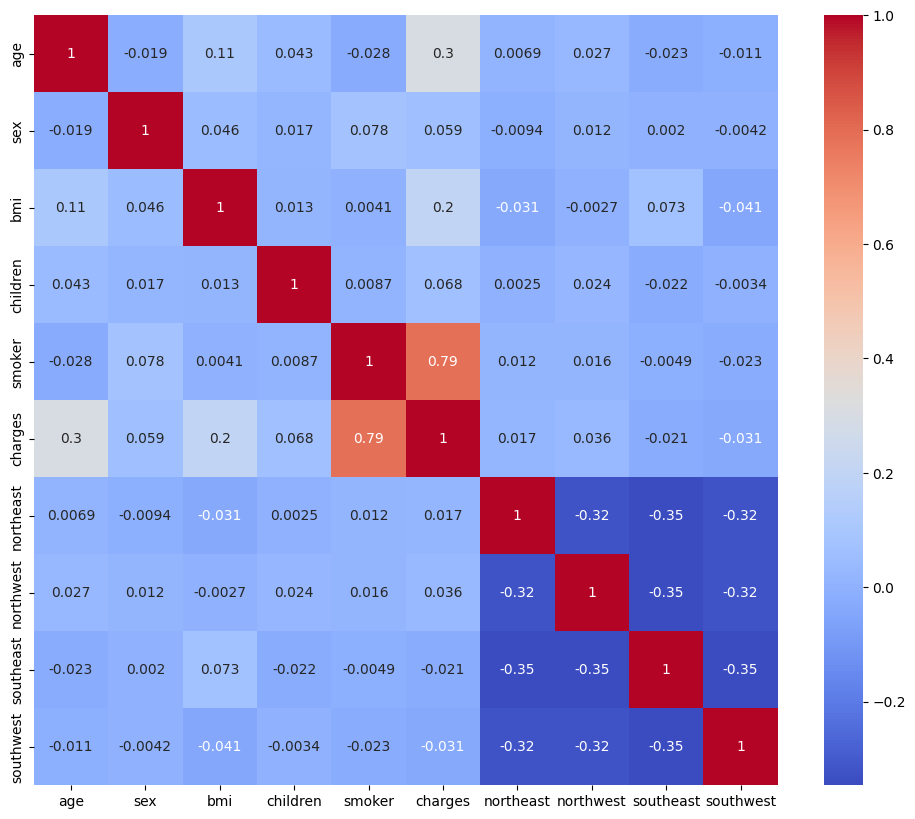

In [115]:
# plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

On remarque une forte corrélation entre le fait d'être fumeur et le coût des charges médicales.
On s'attendait à ce que l'âge et l'IMC aient une influence sur le coût des charges médicales, mais ça n'a pas l'air d'être le cas.

In [116]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


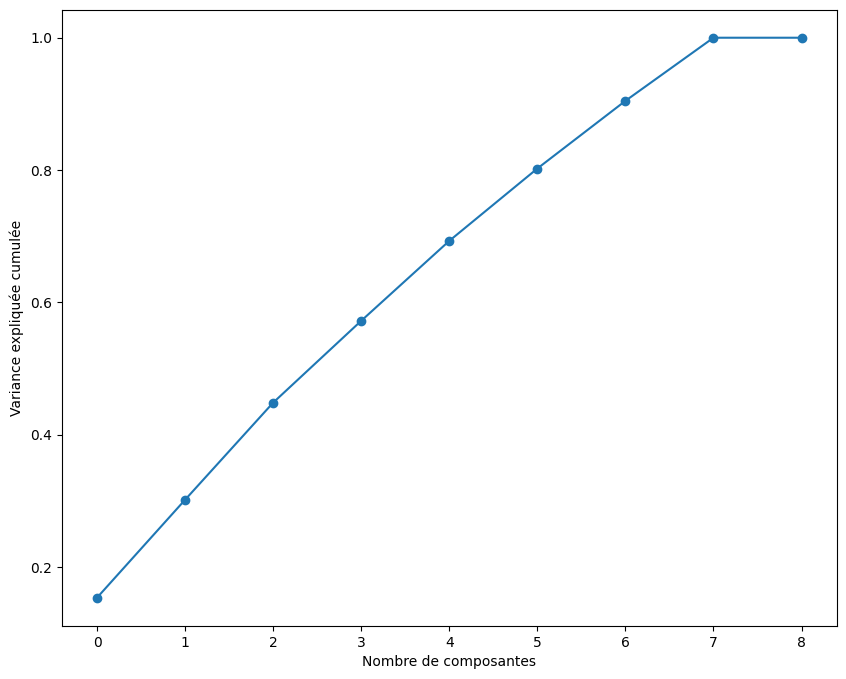

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_features = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")

df_features = df.drop('charges', axis=1)  # Supprime la colonne "charges"

df_features = df_features.fillna(df_features.mean())

# Standardisation des données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_features)

# Application de l'ACP
pca = PCA()
pca.fit(x_scaled)

# Visualisation de la variance expliquée cumulée
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()

# Transformation des données
x_pca = pca.transform(x_scaled)

In [118]:
df_features = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")
df_features

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,-1.440016,-1.010535,-0.453197,-0.909856,1.973265,-0.565825,-0.565825,-0.610797,1.763737,16884.92400
1,-1.511283,0.989575,0.509049,-0.080117,-0.506774,-0.565825,-0.565825,1.637205,-0.566978,1725.55230
2,-0.798610,0.989575,0.382826,1.579361,-0.506774,-0.565825,-0.565825,1.637205,-0.566978,4449.46200
3,-0.442273,0.989575,-1.304793,-0.909856,-0.506774,-0.565825,1.767330,-0.610797,-0.566978,21984.47061
4,-0.513541,0.989575,-0.292550,-0.909856,-0.506774,-0.565825,1.767330,-0.610797,-0.566978,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1330,0.911805,-1.010535,2.300760,1.579361,-0.506774,-0.565825,1.767330,-0.610797,-0.566978,10795.93733
1331,0.769271,0.989575,0.050056,1.579361,-0.506774,1.767330,-0.565825,-0.610797,-0.566978,11411.68500
1332,-1.511283,-1.010535,0.205785,-0.909856,-0.506774,-0.565825,-0.565825,1.637205,-0.566978,10600.54830
1333,-1.511283,-1.010535,1.013941,-0.909856,-0.506774,-0.565825,-0.565825,-0.610797,1.763737,2205.98080


In [119]:
df_features.isna().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
northeast    0
northwest    0
southeast    0
southwest    0
charges      0
dtype: int64

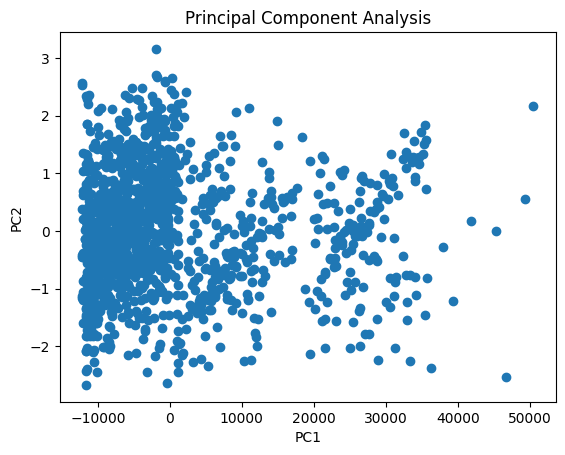

In [131]:
# Principal Component Analysis (PCA)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_features[['age', 'bmi', 'charges']])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis')
plt.show()

<BarContainer object of 2 artists>

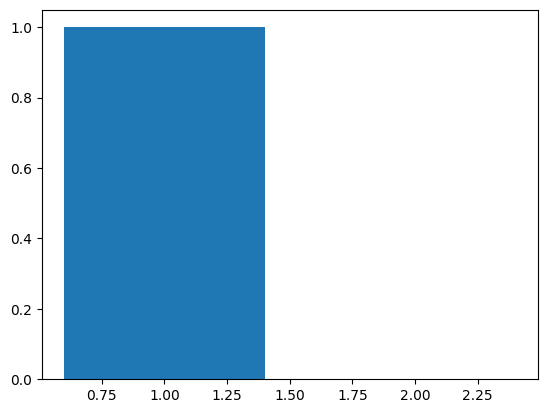

In [121]:
plt.bar(range(1,1+len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

(array([135., 106., 106.,  90.,  98.,  90.,  82.,  73.,  88.,  65.,  45.,
         17.,  19.,  20.,  28.,  20.,  22.,  13.,  19.,  12.,  11.,   9.,
          6.,   6.,   2.,   6.,  15.,  12.,  12.,  14.,  15.,  13.,  10.,
          7.,  12.,   8.,  11.,   8.,   4.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   2.]),
 array([ 1121.8739   ,  2374.8449822,  3627.8160644,  4880.7871466,
         6133.7582288,  7386.729311 ,  8639.7003932,  9892.6714754,
        11145.6425576, 12398.6136398, 13651.584722 , 14904.5558042,
        16157.5268864, 17410.4979686, 18663.4690508, 19916.440133 ,
        21169.4112152, 22422.3822974, 23675.3533796, 24928.3244618,
        26181.295544 , 27434.2666262, 28687.2377084, 29940.2087906,
        31193.1798728, 32446.150955 , 33699.1220372, 34952.0931194,
        36205.0642016, 37458.0352838, 38711.006366 , 39963.9774482,
        41216.9485304, 42469.9196126, 43722.8906948, 44975.861777 ,
        46228.8328592, 47481.8039414, 48734.77

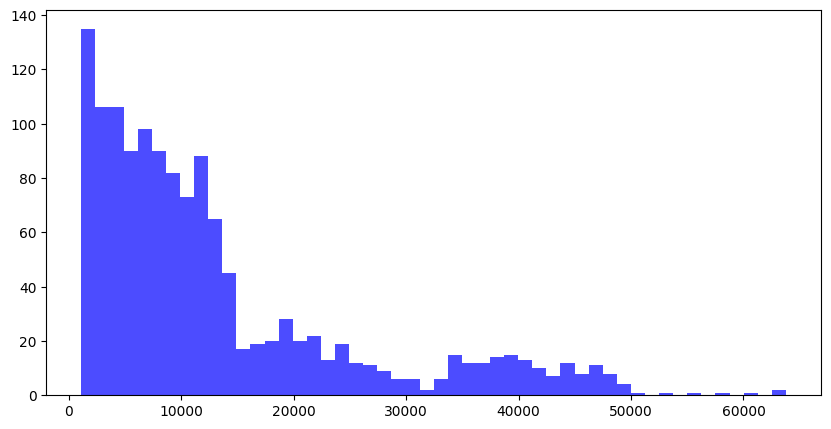

In [122]:
#charges hist
plt.figure(figsize=(10, 5))
plt.hist(df["charges"], bins=50, color='blue', alpha=0.7)

In [123]:
q1 = df["charges"].quantile(0.25)
q2 = df["charges"].quantile(0.5)
q3 = df["charges"].quantile(0.75)

df["charges"].describe()

count     1336.000000
mean     13267.248553
std      12107.107658
min       1121.873900
25%       4744.325050
50%       9382.033000
75%      16604.302645
max      63770.428010
Name: charges, dtype: float64

In [124]:
# split charges into 4 categories

df["charges_cat"] = df["charges"].apply(lambda x: 1 if x < q1 else 2 if x < q2 else 3 if x < q3 else 4)

df["charges_cat"].value_counts()

charges_cat
4    334
1    334
2    334
3    334
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7be67c164a30>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'Q1'),
  Text(-0.7778174593052025, -0.7778174593052023, 'Q2'),
  Text(0.7778174593052022, -0.7778174593052025, 'Q3'),
  Text(0.7778174593052025, 0.7778174593052022, 'Q4')],
 [Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%'),
  Text(0.4242640687119286, 0.4242640687119284, '25.0%')])

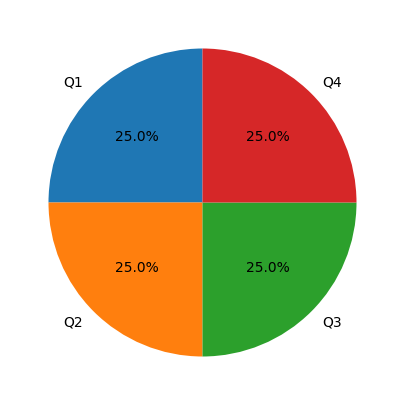

In [125]:
# Répartition des charges par catégorie
plt.figure(figsize=(10, 5))
plt.pie(df["charges_cat"].value_counts(), labels=["Q1", "Q2", "Q3", "Q4"], autopct="%1.1f%%", startangle=90)

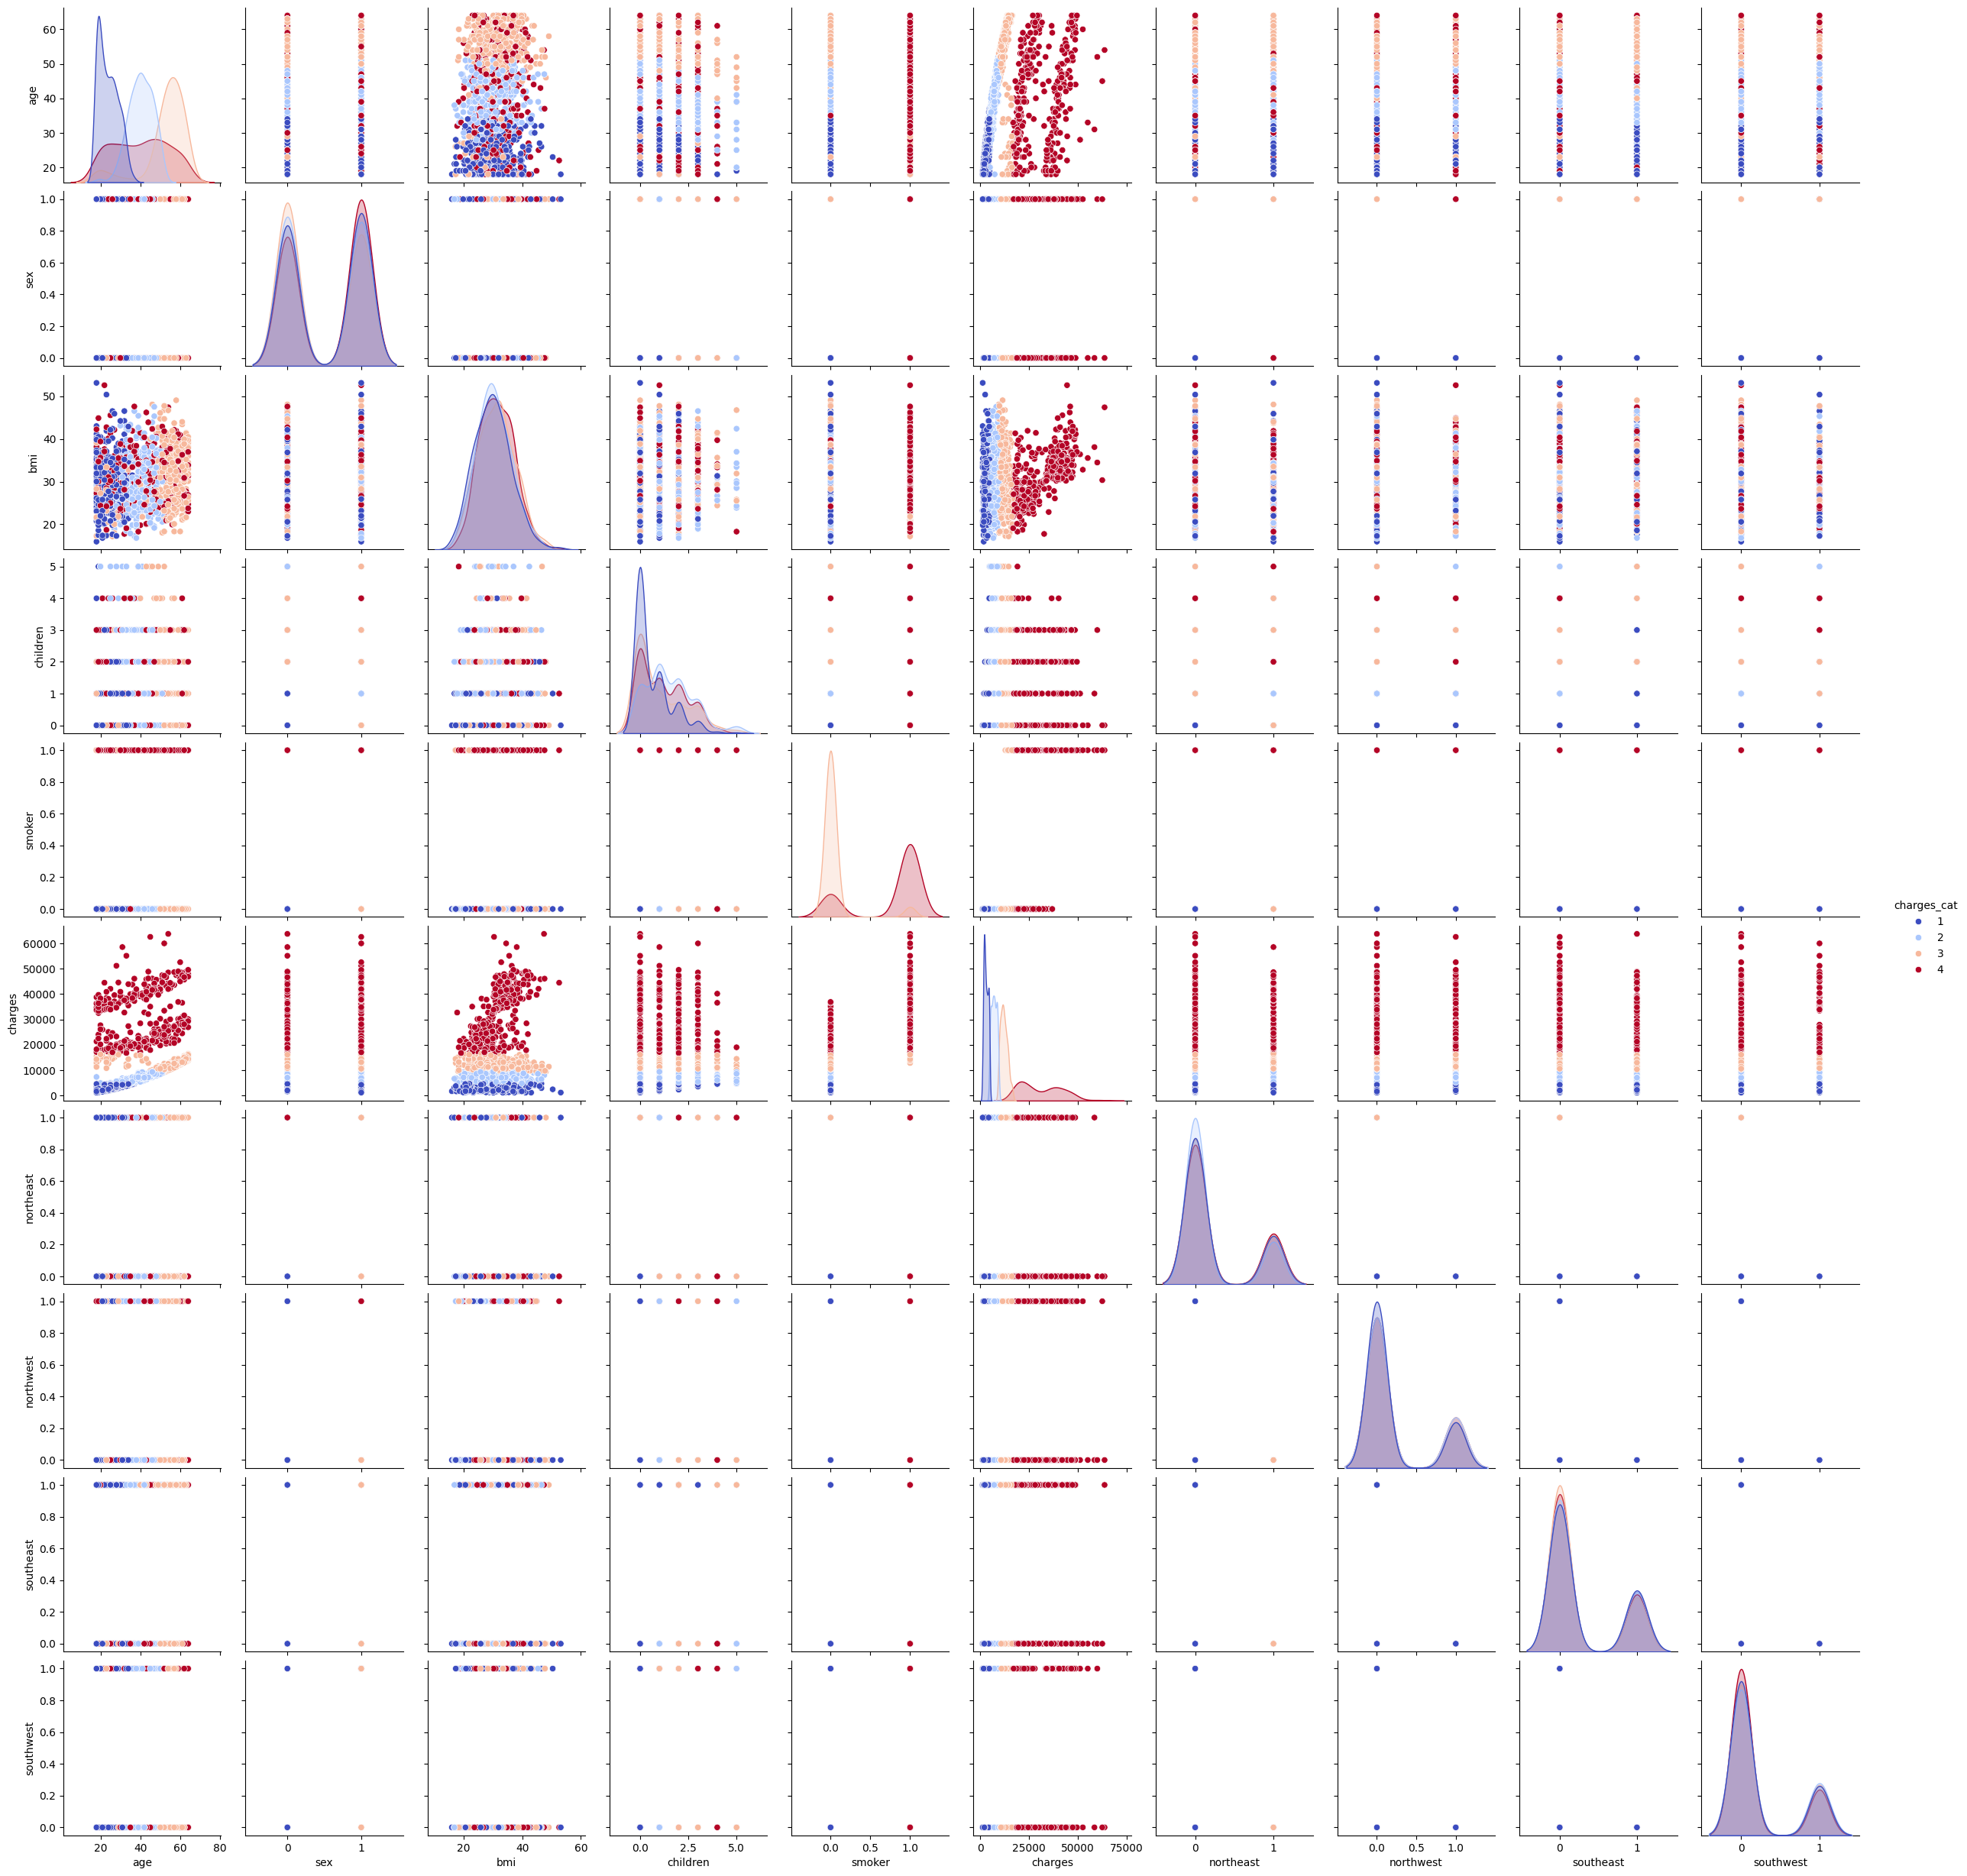

In [126]:
sns.pairplot(df, hue='charges_cat', palette='coolwarm')
plt.show()

<Axes: xlabel='pca1', ylabel='pca2'>

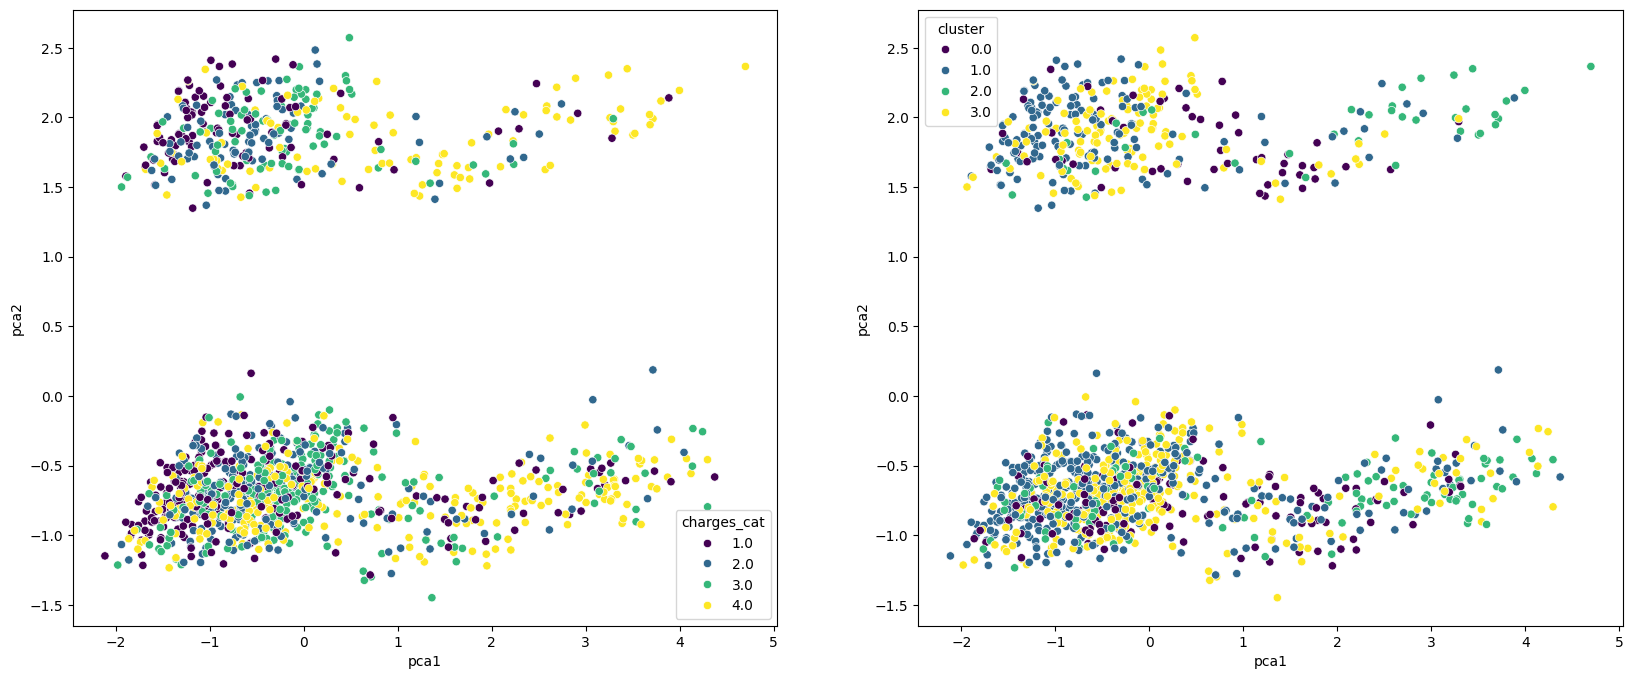

In [127]:
# clustering
from sklearn.cluster import KMeans

# 6  car nbr de charges_cat diff
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

df['cluster'] = kmeans.labels_


pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(x_pca, columns=['pca1', 'pca2'])
df_pca['cluster'] = df['cluster']
df_pca['charges_cat'] = df['charges_cat']

# plot sub figurre

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='charges_cat', palette='viridis', ax=ax[0])
sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='cluster', palette='viridis', ax=ax[1])


<Axes: xlabel='pca1', ylabel='pca2'>

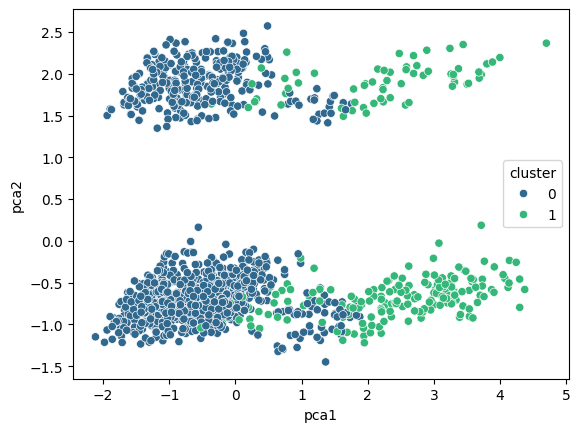

In [128]:
# cluster 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

df_pca['cluster'] = kmeans.labels_

sns.scatterplot(x='pca1', y='pca2', data=df_pca, hue='cluster', palette='viridis')